# Session 3

## CNN Main Points

Developing deep learning models, we started stacking fully connected layers (Dense Layers) applying forward and backward propagartion to train the model reducing error metric. Working with image data we found that it worked just fine for small images but it breaks down for larger images because of the huge number of parameters it requires.

For example, a 100 × 100 image has 10,000 pixels, and if the first layer has just 1,000 neurons (which already severely
restricts the amount of information transmitted to the next layer), this means a total of 10 million connections. And that’s just the first layer.

CNNs solve this problem using ***partially connected layers*** and ***weight sharing***.

What's CNN?

Convolutional Neural Networks utilized the idea of image-filter convolution (typically cross corrolation) to specify receptive field with the size of the filter resulting in a feature map.

**partially connected layers** means that withing the stacked CNN layers. The neurons in a layer are not *fully* connected to the neurons in the previous layer. Instead, they are connected to neurons in their receptive field (size of the filter) mimicing the architecture of the visual cortex, enabling the network to combine low-level features into more complex features.

**weight sharing** means that the neurons (pixels) in the same feature map share the same weights (filter values). And, the model can have multiple filters (and multiple feature maps accordingly) to inspect more feature combinations.

The fact that all neurons in a feature map share the same parameters dramatically reduces the number of parameters in the model making it faster to train and reduces overfitting. Moreover, once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location. In contrast, once a regular DNN has learned to recognize a pattern in one location, it can recognize it only in that particular location.

CNN receives the input image in its natural shape (2d with multiple channels) without flatten the input to 1d,which makes it easier to match neurons with their corresponding inputs.

Following the CNN layer, comes the pooling layer. The pooling layer defines a static (non trainable) kernel to apply an aggregate function (maxing, averaging) over it. For example, taking the maximum value out of 9 values over a 3x3 square filter. This reduces the dimensions making the model faster to train, reduces the computational load, the memory usage, and the number of parameters
(thereby limiting the risk of overfitting). 

Moreover, it introduces some variance to the model making it robust to some changes line translation or scaling.

The pooling layer subsampling algorithm can be too destructive to tolerate in some applications.

**CNN and pooling layer hyperparameters include:**
- Number of filters (number of feature maps the layer produces)
- Size of the filter (receptive field)
- Layer activation function
- Horizontal and vertical stride (number of pixels to slide over while scanning the input with the filter)
- Padding typing (how to deal with the borders)
- Pooling layer kernel size

**Some tips building CNN models:**
- It's preferable to use multiple layers with small kernels than using one layer with larger kernel
For example, instead of using a convolutional layer with a 5 × 5 kernel, it is generally preferable to stack two layers with 3 × 3 kernels: it will use less parameters and require less computations, and it will usually perform better. One exception to this recommendation is for the first convolutional layer: it can typically have a large kernel (e.g., 5 × 5), usually with stride of 2 or more: this will reduce the spatial dimension of the image without losing too much information.


- It's recommened to start with smaller number of kernels in the early layers, then increase it to larger number with the following layers. As, the low-level features' number is usually small (lines, small circles, etc.), but there are many different ways to combine them into higher level features. It is a common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by a factor (let's say a factor of 2), we can afford doubling the number of feature maps in the next layer, without fear of exploding the number of parameters, memory usage, or computational load.

- It's recommened to go for ReLU and its variations as an activation funciton. Do you remember why ?
- You can manipulate the stride to control the size of the consecutive layers.
- If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the CNN across multiple devices.

- You can always utilize literature and pre-trained models using transfer learning

## CIFAR 10

The CIFAR-10 dataset contains small photos belonging to 10 classes. It is usually used in classification tasks as a standard dataset for computer vision and deep learning research or learning purposes.

### Dataset description, loading and preprocessing

Canadian Institute For Advanced Research (CIFAR) developed this dataset for researchers along with CIFAR-100 (similar dataset with 100 classes). It contains 60,000 23x23 pixel color images and the 10 classes as follows:

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

The CIFAR problem is solved, meaning that's straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.

You can check this [link](https://paperswithcode.com/sota/image-classification-on-cifar-10) for more information about successfull models, their ranking and thier scores, papers, etc.

In [1]:
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [3]:
print(trainX.shape)
print(testY.shape)
print(trainX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(10000, 10)
(50000, 32, 32, 3)
(10000, 10)


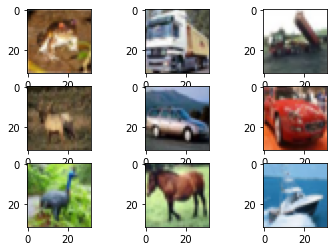

In [4]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [5]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_norm, trainY, test_size= 0.1, random_state= 42)

In [8]:
X_test = test_norm
y_test = testY


In [9]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)
(45000, 10)
(5000, 10)
(10000, 10)


In [10]:
del trainX, testX, testY, trainY

### Baseline Model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data= (X_val, y_val), verbose=1)

Epoch 1/20
704/704 [==============================] - 12s 12ms/step - loss: 1.4073 - accuracy: 0.5054 - val_loss: 1.1326 - val_accuracy: 0.6098
Epoch 2/20
704/704 [==============================] - 7s 10ms/step - loss: 0.9894 - accuracy: 0.6555 - val_loss: 0.9773 - val_accuracy: 0.6580
Epoch 3/20
704/704 [==============================] - 5s 7ms/step - loss: 0.8373 - accuracy: 0.7068 - val_loss: 0.9311 - val_accuracy: 0.6686
Epoch 4/20
704/704 [==============================] - 7s 9ms/step - loss: 0.7183 - accuracy: 0.7498 - val_loss: 0.9184 - val_accuracy: 0.6794
Epoch 5/20
704/704 [==============================] - 6s 9ms/step - loss: 0.6143 - accuracy: 0.7839 - val_loss: 0.9538 - val_accuracy: 0.6808
Epoch 6/20
704/704 [==============================] - 6s 8ms/step - loss: 0.5075 - accuracy: 0.8226 - val_loss: 0.9973 - val_accuracy: 0.6758
Epoch 7/20
704/704 [==============================] - 5s 7ms/step - loss: 0.4142 - accuracy: 0.8572 - val_loss: 1.0625 - val_accuracy: 0.6786
Epo

In [14]:
_, acc = model.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 2s 5ms/step - loss: 2.7444 - accuracy: 0.6476
> 64.760


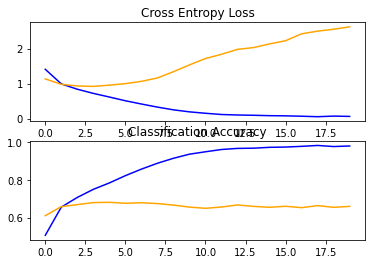

In [15]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

### Model Improvement

**Improvement 1**

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data= (X_val, y_val), verbose=1)

Epoch 1/20
704/704 [==============================] - 7s 9ms/step - loss: 1.4305 - accuracy: 0.4886 - val_loss: 1.1110 - val_accuracy: 0.6068
Epoch 2/20
704/704 [==============================] - 6s 9ms/step - loss: 0.9591 - accuracy: 0.6645 - val_loss: 0.8922 - val_accuracy: 0.6816
Epoch 3/20
704/704 [==============================] - 6s 9ms/step - loss: 0.7789 - accuracy: 0.7294 - val_loss: 0.8052 - val_accuracy: 0.7212
Epoch 4/20
704/704 [==============================] - 6s 9ms/step - loss: 0.6458 - accuracy: 0.7766 - val_loss: 0.7844 - val_accuracy: 0.7294
Epoch 5/20
704/704 [==============================] - 7s 10ms/step - loss: 0.5425 - accuracy: 0.8128 - val_loss: 0.8096 - val_accuracy: 0.7316
Epoch 6/20
704/704 [==============================] - 6s 9ms/step - loss: 0.4432 - accuracy: 0.8450 - val_loss: 0.7945 - val_accuracy: 0.7440
Epoch 7/20
704/704 [==============================] - 6s 8ms/step - loss: 0.3626 - accuracy: 0.8709 - val_loss: 0.8629 - val_accuracy: 0.7298
Epoch

In [19]:
_, acc = model.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 2s 5ms/step - loss: 1.9449 - accuracy: 0.7181
> 71.810


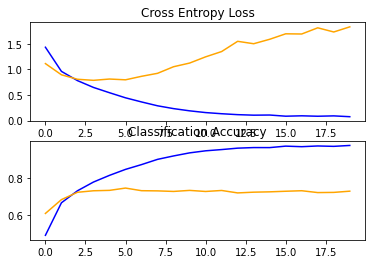

In [20]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

**Improvement 2**

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data= (X_val, y_val), verbose=1)

Epoch 1/20
704/704 [==============================] - 8s 11ms/step - loss: 1.4610 - accuracy: 0.4702 - val_loss: 1.3352 - val_accuracy: 0.5368
Epoch 2/20
704/704 [==============================] - 7s 10ms/step - loss: 0.9665 - accuracy: 0.6584 - val_loss: 0.8348 - val_accuracy: 0.7072
Epoch 3/20
704/704 [==============================] - 7s 10ms/step - loss: 0.7562 - accuracy: 0.7365 - val_loss: 0.7937 - val_accuracy: 0.7180
Epoch 4/20
704/704 [==============================] - 7s 10ms/step - loss: 0.6151 - accuracy: 0.7862 - val_loss: 0.7396 - val_accuracy: 0.7438
Epoch 5/20
704/704 [==============================] - 7s 9ms/step - loss: 0.4971 - accuracy: 0.8241 - val_loss: 0.7463 - val_accuracy: 0.7528
Epoch 6/20
704/704 [==============================] - 7s 10ms/step - loss: 0.4051 - accuracy: 0.8575 - val_loss: 0.7620 - val_accuracy: 0.7536
Epoch 7/20
704/704 [==============================] - 7s 10ms/step - loss: 0.3162 - accuracy: 0.8878 - val_loss: 0.7974 - val_accuracy: 0.7628


In [23]:
_, acc = model.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 5ms/step - loss: 1.4984 - accuracy: 0.7537
> 75.370


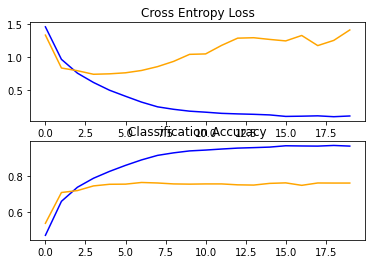

In [24]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

**Introducing Regularization**

**Dropout**

In [25]:
from tensorflow.keras.layers import Dropout

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data= (X_val, y_val), verbose=1)

Epoch 1/100
704/704 [==============================] - 8s 10ms/step - loss: 1.7428 - accuracy: 0.3566 - val_loss: 1.3388 - val_accuracy: 0.5248
Epoch 2/100
704/704 [==============================] - 7s 10ms/step - loss: 1.2488 - accuracy: 0.5530 - val_loss: 1.0203 - val_accuracy: 0.6358
Epoch 3/100
704/704 [==============================] - 7s 10ms/step - loss: 1.0285 - accuracy: 0.6384 - val_loss: 0.8840 - val_accuracy: 0.6784
Epoch 4/100
704/704 [==============================] - 7s 10ms/step - loss: 0.9000 - accuracy: 0.6834 - val_loss: 0.7903 - val_accuracy: 0.7146
Epoch 5/100
704/704 [==============================] - 7s 10ms/step - loss: 0.8054 - accuracy: 0.7159 - val_loss: 0.7546 - val_accuracy: 0.7352
Epoch 6/100
704/704 [==============================] - 7s 10ms/step - loss: 0.7373 - accuracy: 0.7435 - val_loss: 0.7414 - val_accuracy: 0.7418
Epoch 7/100
704/704 [==============================] - 8s 11ms/step - loss: 0.6800 - accuracy: 0.7619 - val_loss: 0.6444 - val_accuracy:

In [28]:
_, acc = model.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 2s 5ms/step - loss: 0.8014 - accuracy: 0.8128
> 81.280


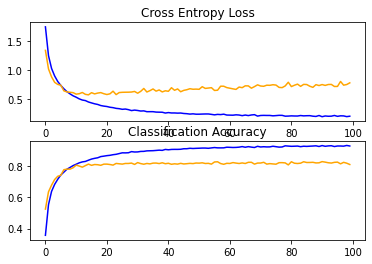

In [29]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

**L2 Regularization**

In [30]:
from keras.regularizers import l2

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data= (X_val, y_val), verbose=1)

Epoch 1/20
704/704 [==============================] - 8s 11ms/step - loss: 2.0016 - accuracy: 0.4429 - val_loss: 1.5250 - val_accuracy: 0.5706
Epoch 2/20
704/704 [==============================] - 7s 10ms/step - loss: 1.4066 - accuracy: 0.6146 - val_loss: 1.3068 - val_accuracy: 0.6426
Epoch 3/20
704/704 [==============================] - 7s 10ms/step - loss: 1.1905 - accuracy: 0.6898 - val_loss: 1.2022 - val_accuracy: 0.6802
Epoch 4/20
704/704 [==============================] - 7s 10ms/step - loss: 1.0858 - accuracy: 0.7251 - val_loss: 1.0525 - val_accuracy: 0.7354
Epoch 5/20
704/704 [==============================] - 7s 10ms/step - loss: 1.0128 - accuracy: 0.7529 - val_loss: 1.0335 - val_accuracy: 0.7500
Epoch 6/20
704/704 [==============================] - 7s 10ms/step - loss: 0.9585 - accuracy: 0.7743 - val_loss: 1.0643 - val_accuracy: 0.7460
Epoch 7/20
704/704 [==============================] - 7s 10ms/step - loss: 0.9128 - accuracy: 0.7928 - val_loss: 0.9982 - val_accuracy: 0.7682

In [33]:
_, acc = model.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 1.0842 - accuracy: 0.7639
> 76.390


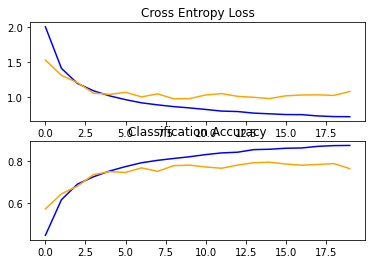

In [34]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

**Data Augmentation**

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [37]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)

In [38]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data= (X_val, y_val), verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


703/703 [==============================] - 25s 35ms/step - loss: 1.5589 - accuracy: 0.4333 - val_loss: 1.2232 - val_accuracy: 0.5618
Epoch 2/20
703/703 [==============================] - 25s 35ms/step - loss: 1.1147 - accuracy: 0.6031 - val_loss: 0.9365 - val_accuracy: 0.6780
Epoch 3/20
703/703 [==============================] - 24s 35ms/step - loss: 0.9259 - accuracy: 0.6759 - val_loss: 0.8622 - val_accuracy: 0.6992
Epoch 4/20
703/703 [==============================] - 25s 35ms/step - loss: 0.8172 - accuracy: 0.7158 - val_loss: 0.7466 - val_accuracy: 0.7406
Epoch 5/20
703/703 [==============================] - 25s 35ms/step - loss: 0.7400 - accuracy: 0.7416 - val_loss: 0.6809 - val_accuracy: 0.7642
Epoch 6/20
703/703 [==============================] - 25s 35ms/step - loss: 0.6898 - accuracy: 0.7605 - val_loss: 0.6691 - val_accuracy: 0.7718
Epoch 7/20
703/703 [==============================] - 25s 35ms/step - loss: 0.6382 - accuracy: 0.7773 - val_loss: 0.6622 - val_accuracy: 0.7756
Epo

In [39]:
_, acc = model.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 2s 5ms/step - loss: 0.5447 - accuracy: 0.8230
> 82.300


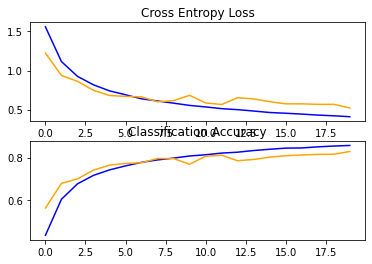

In [40]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

**Increase Dropput, Combine Batch Normalization with data augmentation**

In [41]:
from keras.layers import BatchNormalization

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [44]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data= (X_val, y_val), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
703/703 [==============================] - 27s 37ms/step - loss: 1.7865 - accuracy: 0.3826 - val_loss: 1.4664 - val_accuracy: 0.4792
Epoch 2/100
703/703 [==============================] - 26s 37ms/step - loss: 1.3088 - accuracy: 0.5301 - val_loss: 1.2690 - val_accuracy: 0.5724
Epoch 3/100
703/703 [==============================] - 26s 37ms/step - loss: 1.1188 - accuracy: 0.6048 - val_loss: 0.9686 - val_accuracy: 0.6554
Epoch 4/100
703/703 [==============================] - 26s 37ms/step - loss: 0.9932 - accuracy: 0.6508 - val_loss: 0.9465 - val_accuracy: 0.6788
Epoch 5/100
703/703 [==============================] - 26s 37ms/step - loss: 0.9187 - accuracy: 0.6804 - val_loss: 0.7638 - val_accuracy: 0.7328
Epoch 6/100
703/703 [==============================] - 26s 37ms/step - loss: 0.8563 - accuracy: 0.7031 - val_loss: 0.7865 - val_accuracy: 0.7262
Epoch 7/100
703/703 [==============================] - 26s 37ms/step - loss: 0.8014 - accuracy: 0.7232 - val_loss: 0.7272 - val_ac

In [45]:
_, acc = model.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 2s 5ms/step - loss: 0.3548 - accuracy: 0.8831
> 88.310


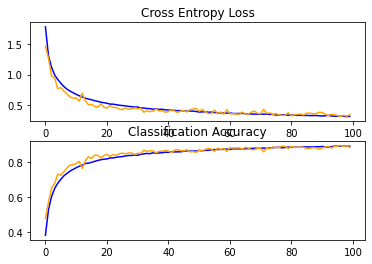

In [46]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

**Saving The model**

In [47]:
# save model
model.save('final_model.h5')

Discussing and further improvements

## Sources

- Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron (O’Reilly). Copyright 2019 Aurélien Géron, 978-1-492-03264-9
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
- http://introtodeeplearning.com/
- https://course.fast.ai/
- https://pyimagesearch.com/
- https://sisu.ut.ee/imageprocessing/book/6
- https://www.simplilearn.com/image-processing-article
- https://pythonprogramming.net/color-filter-python-opencv-tutorial/
- https://www.analyticsvidhya.com/blog/2021/05/image-processing-using-opencv-with-practical-examples/#h2_11
- https://www.youtube.com/watch?v=1_hwFc8PXVE&list=PL2zRqk16wsdorCSZ5GWZQr1EMWXs2TDeu&index=7